In [1]:
import requests
import pandas as pd
import sqlite3

In [2]:
def json_to_dataframe(data_entrada):
    
    elements = data_entrada['data']
    
    places = {'retweet_count': [], 'reply_count': [], 'like_count': [],'quote_count': [],
    'fecha': [],'author_id': [],'id': [],'text': []}

    for i in elements:
        retweet_count = i['public_metrics']['retweet_count']
        reply_count = i['public_metrics']['reply_count']
        like_count = i['public_metrics']['like_count']
        quote_count = i['public_metrics']['quote_count']
        fecha = i['created_at']
        author_id = i['author_id']
        id = i['id']
        text = i['text']

        
        
        
        places['retweet_count'].append(retweet_count)
        places['reply_count'].append(reply_count)
        places['like_count'].append(like_count)
        places['quote_count'].append(quote_count)
        places['fecha'].append(fecha)
        places['author_id'].append(author_id)
        places['id'].append(id)
        places['text'].append(text)

    df = pd.DataFrame(places)

    return df

In [3]:
def user_username(data_entrada):
    
    places1 = {'name': [],'username': [],'id': []}
    elements1 = data_entrada['includes']['users']

    for i in elements1:

        id = i['id']
        name = i['name']
        username = i['username']
        
        places1['id'].append(id)
        places1['name'].append(name)
        places1['username'].append(username)

    df1 = pd.DataFrame(places1)

    return df1

In [4]:
bearer_token='AAAAAAAAAAAAAAAAAAAAAH%2BhhwEAAAAAegjWSsTuvEQgUz%2FEkTHubAWPwno%3Dx2OAgQ3rOahYpKGQjfzeJdTZS4V4lorpLDHEZJHstttv7NQxep'
headers = {'Authorization': 'Bearer ' + bearer_token};

params = {
    "max_results" : 100,
    'start_time':'2022-06-29T00:00:00.000Z',
    'end_time' : '2022-10-06T00:00:00.000Z',
    'tweet.fields': 'author_id,created_at,id,public_metrics,source,text',
    'expansions': 'author_id',
    'user.fields': 'id,name,username'
}

url = 'https://api.twitter.com/2/users/1162694149956603904/mentions'

res = requests.get(url,params=params, headers=headers)
y = res.json()
y

{'data': [{'text': 'Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech, en el que tendremos la gran suerte de contar con @Recuenco para que nos dé una charla. Las plazas se han agotado, pero os podéis apuntar al grupo para próximas quedadas 🚀',
   'edit_history_tweet_ids': ['1577334577701453827'],
   'source': 'Twitter Web App',
   'created_at': '2022-10-04T16:27:23.000Z',
   'author_id': '1003872445',
   'public_metrics': {'retweet_count': 2,
    'reply_count': 0,
    'like_count': 12,
    'quote_count': 0},
   'id': '1577334577701453827'},
  {'text': 'El desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈\n\nDescubre nuestro #bootcamp Desarrollo Web Full Stack de la mano de @TheBridge_Tech 💻\n\nToda la información aquí! 👇\nhttps://t.co/LOoTu97aQq https://t.co/xpaAzxXSDX',
   'edit_history_tweet_ids': ['1576902991507922944'],
   'source': 'Twitter Web App',
   'created_at': '2022-10-03T11:52:25.000Z',
   'author

In [5]:
df_return=json_to_dataframe(y)
df_return

,retweet_count,reply_count,like_count,quote_count,fecha,author_id,id,text
0,2,0,12,0,2022-10-04T16:27:23.000Z,1003872445,1577334577701453827,Recordaros que la semana que viene tenemos la ...
1,3,0,3,0,2022-10-03T11:52:25.000Z,2529499620,1576902991507922944,El desarrollador web es uno de los perfiles má...
2,0,0,1,0,2022-10-03T08:48:29.000Z,706520411551494145,1576856703349374976,@jorgegrev @TheBridge_Tech Enhorabuena crack!
3,3,0,4,0,2022-09-28T20:14:18.000Z,604485175,1575217357105946624,Hoy por fin ve la luz mi primer Case Study púb...
4,1,1,2,0,2022-09-27T19:51:59.000Z,1391838162830385165,1574849353172373504,¿Eres o quieres ser talento IT y estás en Espa...
...,...,...,...,...,...,...,...,...
73,0,1,3,0,2022-06-29T19:10:52.000Z,40046861,1542224097089822726,@HeavyMental_es @UbaldoHervas @DavidAlayon @Re...
74,0,0,0,0,2022-06-29T18:09:38.000Z,1437833350732034050,1542208686881390592,No todo va a ser trabajar!! Equipo UCuber #The...
75,3,2,22,3,2022-06-29T18:00:06.000Z,1255794072280842240,1542206287915585536,El sentido de la vida ya no es 42 -- Light Men...
76,2,1,8,1,2022-06-29T14:22:55.000Z,3319318173,1542151630128381953,"We had a great time yesterday at #TechTalks, t..."


In [6]:
bearer_token='AAAAAAAAAAAAAAAAAAAAAH%2BhhwEAAAAAegjWSsTuvEQgUz%2FEkTHubAWPwno%3Dx2OAgQ3rOahYpKGQjfzeJdTZS4V4lorpLDHEZJHstttv7NQxep'
headers = {'Authorization': 'Bearer ' + bearer_token};

params = {
    "max_results" : 100,
    'start_time':'2022-06-13T00:00:00.000Z',
    'end_time' : '2022-06-29T00:00:00.000Z',
    'tweet.fields': 'author_id,created_at,id,public_metrics,source,text',
    'expansions': 'author_id',
    'user.fields': 'id,name,username'
}

url = 'https://api.twitter.com/2/users/1162694149956603904/mentions'

res = requests.get(url,params=params, headers=headers)
x = res.json()
x

{'data': [{'created_at': '2022-06-28T19:02:45.000Z',
   'text': '@fernandojsg @HeavyMental_es @DavidAlayon @Recuenco @_miki @GuillermoDeHaro @TheBridge_Tech Y queremos.',
   'public_metrics': {'retweet_count': 0,
    'reply_count': 0,
    'like_count': 3,
    'quote_count': 0},
   'edit_history_tweet_ids': ['1541859665570664448'],
   'author_id': '1434890317640126469',
   'source': 'Twitter for Android',
   'id': '1541859665570664448'},
  {'created_at': '2022-06-28T18:24:37.000Z',
   'text': '@HeavyMental_es @DavidAlayon @Recuenco @_miki @GuillermoDeHaro @TheBridge_Tech Mens sana in corpore sano https://t.co/PJJ7Eg0KPQ',
   'public_metrics': {'retweet_count': 0,
    'reply_count': 0,
    'like_count': 8,
    'quote_count': 1},
   'edit_history_tweet_ids': ['1541850071456792578'],
   'author_id': '144581964',
   'source': 'Twitter Web App',
   'id': '1541850071456792578'},
  {'created_at': '2022-06-28T17:07:39.000Z',
   'text': '@GuillermoDeHaro @Mulder01198676 @HeavyMental_es @DavidAla

In [7]:
df_return1=json_to_dataframe(x)
df_return1

,retweet_count,reply_count,like_count,quote_count,fecha,author_id,id,text
0,0,0,3,0,2022-06-28T19:02:45.000Z,1434890317640126469,1541859665570664448,@fernandojsg @HeavyMental_es @DavidAlayon @Rec...
1,0,0,8,1,2022-06-28T18:24:37.000Z,144581964,1541850071456792578,@HeavyMental_es @DavidAlayon @Recuenco @_miki ...
2,0,0,3,0,2022-06-28T17:07:39.000Z,427660452,1541830701863034880,@GuillermoDeHaro @Mulder01198676 @HeavyMental_...
3,0,0,3,0,2022-06-28T16:50:57.000Z,317352917,1541826498650406913,@HeavyMental_es @DavidAlayon @Recuenco @_miki ...
4,0,0,2,0,2022-06-28T16:14:57.000Z,276656109,1541817440207884288,@didacjo1 @_miki @samuelgil He de decir que lu...
...,...,...,...,...,...,...,...,...
70,0,0,1,0,2022-06-13T11:42:21.000Z,18955785,1536313018321190912,Lo conseguí!!! Gracias @TheBridge_Tech @Heavy...
71,0,0,1,0,2022-06-13T11:38:00.000Z,15521945,1536311923423203331,@TheBridge_Tech @HeavyMental_es @Alienta ¡Y yo...
72,0,0,2,0,2022-06-13T11:34:19.000Z,10614452,1536310998319210496,@TheBridge_Tech @HeavyMental_es @Alienta ¡La t...
73,2,4,6,0,2022-06-13T11:33:09.000Z,1255794072280842240,1536310702876549123,Lo prometimos y han llegado gracias a @TheBrid...


In [8]:
df_text = pd.concat([df_return,df_return1], join='inner')

In [9]:
df_text

,retweet_count,reply_count,like_count,quote_count,fecha,author_id,id,text
0,2,0,12,0,2022-10-04T16:27:23.000Z,1003872445,1577334577701453827,Recordaros que la semana que viene tenemos la ...
1,3,0,3,0,2022-10-03T11:52:25.000Z,2529499620,1576902991507922944,El desarrollador web es uno de los perfiles má...
2,0,0,1,0,2022-10-03T08:48:29.000Z,706520411551494145,1576856703349374976,@jorgegrev @TheBridge_Tech Enhorabuena crack!
3,3,0,4,0,2022-09-28T20:14:18.000Z,604485175,1575217357105946624,Hoy por fin ve la luz mi primer Case Study púb...
4,1,1,2,0,2022-09-27T19:51:59.000Z,1391838162830385165,1574849353172373504,¿Eres o quieres ser talento IT y estás en Espa...
...,...,...,...,...,...,...,...,...
70,0,0,1,0,2022-06-13T11:42:21.000Z,18955785,1536313018321190912,Lo conseguí!!! Gracias @TheBridge_Tech @Heavy...
71,0,0,1,0,2022-06-13T11:38:00.000Z,15521945,1536311923423203331,@TheBridge_Tech @HeavyMental_es @Alienta ¡Y yo...
72,0,0,2,0,2022-06-13T11:34:19.000Z,10614452,1536310998319210496,@TheBridge_Tech @HeavyMental_es @Alienta ¡La t...
73,2,4,6,0,2022-06-13T11:33:09.000Z,1255794072280842240,1536310702876549123,Lo prometimos y han llegado gracias a @TheBrid...


In [10]:
df_text.reset_index(inplace=True)
df_text.drop(["index"],axis=1,inplace=True)

In [11]:
df1 = user_username(y)
df2 = user_username(x)

In [12]:
df_user = pd.concat([df1,df2],join='inner')
df_user.reset_index(inplace=True)
df_user.drop(["index"],axis=1,inplace=True)
df_user

,name,username,id
0,Pau Mugarra,PauMugarra,1003872445
1,Formación Fundación Universidad Carlos III,formacion_fuc3,2529499620
2,JoseSola,Jose_Sola_,706520411551494145
3,Berta Otero,bertinha84,604485175
4,Apiux Tecnología,Apiuxtecnologia,1391838162830385165
...,...,...,...
81,Pelayo Arbués,pelayoarbues,55193695
82,Jairo P,PesetJairo,962578275162869760
83,Javi Pérez ⚡ 😎 Learning by doing. 🦾 💻 📚 🚀,JaviMostoles,18955785
84,Bill Murphy,wmurphy,15521945


In [13]:
df_user.drop_duplicates(inplace=True)

# Datos a SQL


In [26]:
connection = sqlite3.connect("database.db")
cusr = connection.cursor()

In [71]:
query = '''
CREATE TABLE tweets (
    retweet_count INT(10),
    reply_count INT(10),
    like_count INT(10),
    quote_count INT(10),
    fecha VARCHAR(32),
    author_id VARCHAR(32),
    id VARCHAR(32),
    text VARCHAR(300),
    PRIMARY KEY (id),
    FOREIGN KEY (author_id) REFERENCES user(id)
)
'''

cusr.execute(query)

In [72]:
df_text.to_sql('tweets', con=connection,if_exists="append",index=False)

In [73]:
query = '''
CREATE TABLE user (
    name VARCHAR(100),
    username VARCHAR(100),
    id VARCHAR(32),
    PRIMARY KEY (id)
    
)
'''

cusr.execute(query)

In [74]:
df_user.to_sql('user', con=connection,if_exists="append",index=False) 

# EDA

In [14]:
df_1=df_text[df_text['retweet_count']==df_text['retweet_count'].max()]
df_1

,retweet_count,reply_count,like_count,quote_count,fecha,author_id,id,text
28,11,0,13,0,2022-08-31T12:20:04.000Z,106344840,1564951151124029441,¿Quieres impulsar tu perfil profesional en el ...


In [15]:
df_2=df_text[df_text['reply_count']==df_text['reply_count'].max()]
df_2

,retweet_count,reply_count,like_count,quote_count,fecha,author_id,id,text
137,6,6,17,1,2022-06-26T13:10:35.000Z,1255794072280842240,1541046264539893760,"🕣 TIC, TAC: MAÑANA os vemos a todos a las 7.30..."


In [16]:
df_3=df_text[df_text['like_count']==df_text['like_count'].max()]
df_3

,retweet_count,reply_count,like_count,quote_count,fecha,author_id,id,text
75,3,2,22,3,2022-06-29T18:00:06.000Z,1255794072280842240,1542206287915585536,El sentido de la vida ya no es 42 -- Light Men...


In [17]:
df_4 = df_text[df_text['quote_count']==df_text['quote_count'].max()]
df_4

,retweet_count,reply_count,like_count,quote_count,fecha,author_id,id,text
5,7,0,20,4,2022-09-23T09:44:36.000Z,1003872445,1573246948693651456,Y seguimos con lo prometido:\n\nPrimera quedad...


In [18]:
df_max = pd.concat([df_1,df_2])

In [19]:
df_max = pd.concat([df_max,df_3])
df_max = pd.concat([df_max,df_4])

In [20]:
df_max

,retweet_count,reply_count,like_count,quote_count,fecha,author_id,id,text
28,11,0,13,0,2022-08-31T12:20:04.000Z,106344840,1564951151124029441,¿Quieres impulsar tu perfil profesional en el ...
137,6,6,17,1,2022-06-26T13:10:35.000Z,1255794072280842240,1541046264539893760,"🕣 TIC, TAC: MAÑANA os vemos a todos a las 7.30..."
75,3,2,22,3,2022-06-29T18:00:06.000Z,1255794072280842240,1542206287915585536,El sentido de la vida ya no es 42 -- Light Men...
5,7,0,20,4,2022-09-23T09:44:36.000Z,1003872445,1573246948693651456,Y seguimos con lo prometido:\n\nPrimera quedad...


In [21]:

import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='Density'>

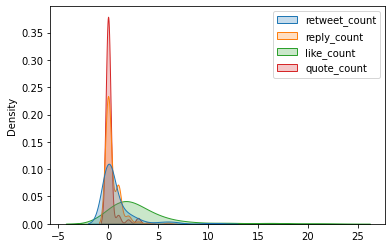

In [22]:
sns.kdeplot(data=df_text, shade=True)

<Figure size 1296x432 with 0 Axes>

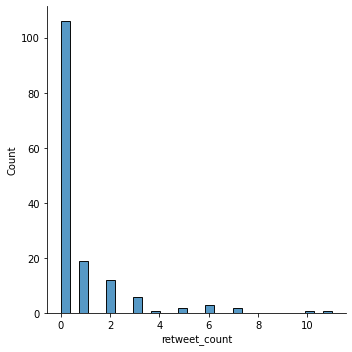

<Figure size 1296x432 with 0 Axes>

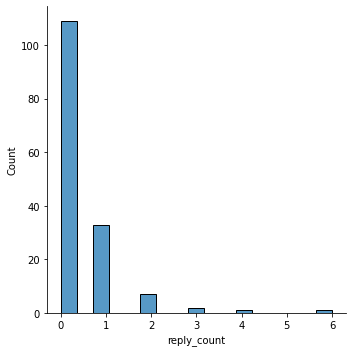

<Figure size 1296x432 with 0 Axes>

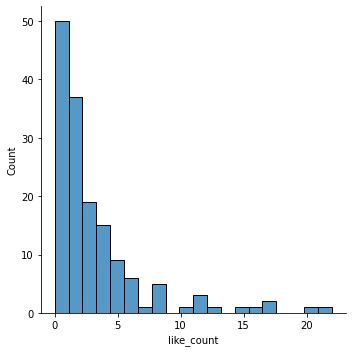

<Figure size 1296x432 with 0 Axes>

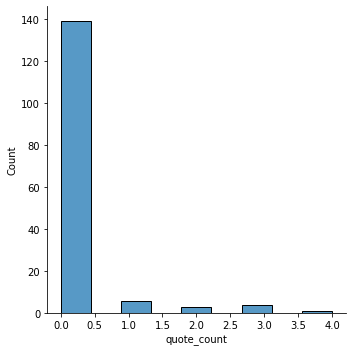

In [23]:
numCols = ['retweet_count', 'reply_count', 'like_count','quote_count']

for col in numCols:
    plt.figure(figsize=(18,6))
    sns.displot(x=col,data=df_text, palette=["#ff006e", "#83c5be", "#3a0ca3"])
    plt.show()

Si se analiza las metricas por separados podemos ver que el que mas retweet_count es la de id: 1564951151124029441. los que tiene mas like_count es la de id: 1573246948693651456. Si quiere conocer cual es el que mas repercusion, se puede asignar distintas puntuaciones a las distintas metricas, creando una columna mas donde se muestraria la puntuacion final que se obtiene. por ejemplo, un retweet puede influencias mas que los likes, por lo que puede darle una mayor puntuacion. 

In [24]:
# Con esta función leemos los datos y lo pasamos a un DataFrame de Pandas
def sql_query(query):

    # Ejecuta la query
    cusr.execute(query)

    # Almacena los datos de la query 
    ans = cusr.fetchall()

    # Obtenemos los nombres de las columnas de la tabla
    names = [description[0] for description in cusr.description]

    return pd.DataFrame(ans,columns=names)

In [27]:
query = '''
SELECT author_id, COUNT(*) as count, name, username FROM tweets
INNER JOIN user ON user.id = tweets.author_id
GROUP BY author_id
ORDER BY count DESC
'''

sql_query(query)

,author_id,count,name,username
0,1255794072280842240,12,Heavy Mental,HeavyMental_es
1,1493264171705765890,9,Mulder,Mulder01198676
2,212364786,7,Gonzalo Osés,designetworking
3,276656109,6,Jorge Ordovás,joobid
4,1162694149956603904,4,The Bridge,TheBridge_Tech
...,...,...,...,...
76,56674550,1,Nacho CG,na5ho
77,706520411551494145,1,JoseSola,Jose_Sola_
78,763323065199628288,1,Zeus,insidezeusdata
79,779234238977675264,1,Daniel Granados,DanielDanigran


Se puede ver que el usuario mas menciona a The Bridge es Heavy Mental en 12 veces. 

In [28]:
df_text['fecha']=[x[:10] for x in df_text['fecha']]
df_text[['year', 'month', 'day']] = df_text['fecha'].str.split('-', expand=True)
df_text['year'] = df_text['year'].astype(int)
df_text['month'] = df_text['month'].astype(int)
df_text['day'] =df_text['day'].astype(int)


In [29]:
df_text[['month']].value_counts()

month
6        88
7        27
9        25
8        10
10        3
dtype: int64

In [30]:
df_text

,retweet_count,reply_count,like_count,quote_count,fecha,author_id,id,text,year,month,day
0,2,0,12,0,2022-10-04,1003872445,1577334577701453827,Recordaros que la semana que viene tenemos la ...,2022,10,4
1,3,0,3,0,2022-10-03,2529499620,1576902991507922944,El desarrollador web es uno de los perfiles má...,2022,10,3
2,0,0,1,0,2022-10-03,706520411551494145,1576856703349374976,@jorgegrev @TheBridge_Tech Enhorabuena crack!,2022,10,3
3,3,0,4,0,2022-09-28,604485175,1575217357105946624,Hoy por fin ve la luz mi primer Case Study púb...,2022,9,28
4,1,1,2,0,2022-09-27,1391838162830385165,1574849353172373504,¿Eres o quieres ser talento IT y estás en Espa...,2022,9,27
...,...,...,...,...,...,...,...,...,...,...,...
148,0,0,1,0,2022-06-13,18955785,1536313018321190912,Lo conseguí!!! Gracias @TheBridge_Tech @Heavy...,2022,6,13
149,0,0,1,0,2022-06-13,15521945,1536311923423203331,@TheBridge_Tech @HeavyMental_es @Alienta ¡Y yo...,2022,6,13
150,0,0,2,0,2022-06-13,10614452,1536310998319210496,@TheBridge_Tech @HeavyMental_es @Alienta ¡La t...,2022,6,13
151,2,4,6,0,2022-06-13,1255794072280842240,1536310702876549123,Lo prometimos y han llegado gracias a @TheBrid...,2022,6,13


Se puede ver que en el mes de junio es donde hay mas menciones.

In [31]:
df_text['text']

0      Recordaros que la semana que viene tenemos la ...
1      El desarrollador web es uno de los perfiles má...
2          @jorgegrev @TheBridge_Tech Enhorabuena crack!
3      Hoy por fin ve la luz mi primer Case Study púb...
4      ¿Eres o quieres ser talento IT y estás en Espa...
                             ...                        
148    Lo conseguí!!! Gracias @TheBridge_Tech  @Heavy...
149    @TheBridge_Tech @HeavyMental_es @Alienta ¡Y yo...
150    @TheBridge_Tech @HeavyMental_es @Alienta ¡La t...
151    Lo prometimos y han llegado gracias a @TheBrid...
152    @HeavyMental_es @PesetJairo @TheBridge_Tech @G...
Name: text, Length: 153, dtype: object

In [32]:
pd.set_option('display.max_colwidth', None)

In [33]:
import numeritos as nito

df_text['text1']=df_text['text'].apply(lambda x :nito.clean_emoji(x))
df_text['text1']

pygame 2.1.2 (SDL 2.0.18, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


0                                            Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech, en el que tendremos la gran suerte de contar con @Recuenco para que nos dé una charla. Las plazas se han agotado, pero os podéis apuntar al grupo para próximas quedadas 
1                                                                El desarrollador web es uno de los perfiles más demandados en el mercado laboral \n\nDescubre nuestro #bootcamp Desarrollo Web Full Stack de la mano de @TheBridge_Tech \n\nToda la información aquí! \nhttps://t.co/LOoTu97aQq https://t.co/xpaAzxXSDX
2                                                                                                                                                                                                                                                                          @jorgegrev @TheBridge_Tech Enhorabuena crack!
3      Hoy por fin ve la luz mi primer Case Study público. Un

In [34]:
import re

signos = re.compile("(\...)|(\_)|(\\n)|(\#)|(\.)|(\;)|(\:)|(\!)|(\?)|(\¿)|(\@)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")

def signs_tweets(tweet):
    return signos.sub('', tweet.lower())

df_text['text1'] = df_text['text1'].apply(signs_tweets)
df_text['text1'].head()

0                            recordaros que la semana que viene tenemos la primera quedada cps en madrid en thebridgetech en el que tendremos la gran suerte de contar con recuenco para que nos dé una charlaas plazas se han agotado pero os podéis apuntar al grupo para próximas quedadas 
1                                                              el desarrollador web es uno de los perfiles más demandados en el mercado laboral descubre nuestro bootcamp desarrollo web full stack de la mano de thebridgetech toda la información aquí https//t/lootuaqq https//t/xpaazxxsdx
2                                                                                                                                                                                                                                                    jorgegrev thebridgetech enhorabuena crack
3    hoy por fin ve la luz mi primer case study públicon trabajo intensivo de fin de bootcamp realizado con un cliente real emancipatic  y 

In [35]:
def remove_links(df):
    return " ".join(['{link}' if ('http') in word else word for word in df.split()])

df_text['text1'] = df_text['text1'].apply(remove_links)
df_text['text1'] 


0      recordaros que la semana que viene tenemos la primera quedada cps en madrid en thebridgetech en el que tendremos la gran suerte de contar con recuenco para que nos dé una charlaas plazas se han agotado pero os podéis apuntar al grupo para próximas quedadas
1                                                               el desarrollador web es uno de los perfiles más demandados en el mercado laboral descubre nuestro bootcamp desarrollo web full stack de la mano de thebridgetech toda la información aquí {link} {link}
2                                                                                                                                                                                                                             jorgegrev thebridgetech enhorabuena crack
3              hoy por fin ve la luz mi primer case study públicon trabajo intensivo de fin de bootcamp realizado con un cliente real emancipatic y dos semanas para que las verticales en thebridgetech hiciése

In [36]:
from nltk.corpus import stopwords

spanish_stopwords = stopwords.words('spanish')

def remove_stopwords(df):
    return " ".join([word for word in df.split() if word not in spanish_stopwords])

df_text['text1'] = df_text['text1'].apply(remove_stopwords)
df_text['text1']

0                                                recordaros semana viene primera quedada cps madrid thebridgetech gran suerte contar recuenco dé charlaas plazas agotado podéis apuntar grupo próximas quedadas
1                                                      desarrollador web perfiles demandados mercado laboral descubre bootcamp desarrollo web full stack mano thebridgetech toda información aquí {link} {link}
2                                                                                                                                                                     jorgegrev thebridgetech enhorabuena crack
3      hoy fin ve luz primer case study públicon trabajo intensivo fin bootcamp realizado cliente real emancipatic dos semanas verticales thebridgetech hiciésemos realidad mvps invito verlo dar {link} {link}
4                                       quieres ser talento it españa si respuesta contamos alianzas idbootcamps thebridgetechestamos felices abrir puertas estudiantes 

In [37]:
from nltk.stem.snowball import SnowballStemmer

def spanish_stemmer(x):
    stemmer = SnowballStemmer('spanish')
    return " ".join([stemmer.stem(word) for word in x.split()])

df_text['text1']  =df_text['text1'] .apply(spanish_stemmer)
df_text['text1']

0                                                        recordar seman vien primer qued cps madr thebridgetech gran suert cont recuenc de charl plaz agot pod apunt grup proxim qued
1                                                   desarroll web perfil demand merc laboral descubr bootcamp desarroll web full stack man thebridgetech tod inform aqu {link} {link}
2                                                                                                                                            jorgegrev thebridgetech enhorabuen crack
3      hoy fin ve luz prim cas study publicon trabaj intens fin bootcamp realiz client real emancipatic dos seman vertical thebridgetech hic realid mvps invit verl dar {link} {link}
4                                         quier ser talent it españ si respuest cont alianz idbootcamps thebridgetechest felic abrir puert estudi partners conviert futur yellowers 🥳
                                                                                          

In [38]:
lista=str(df_text['text1']).split()

In [39]:
from collections import Counter

word_freq = Counter(lista)

word_freq.most_common(10)[:]

[('thebridgetech', 9),
 ('{link}', 6),
 ('heavymental', 4),
 ('seman', 3),
 ('alient', 3),
 ('qued', 2),
 ('cont', 2),
 ('recuenc', 2),
 ('desarroll', 2),
 ('web', 2)]

# Correlación

In [40]:
df_correlacion = df_text[["retweet_count",	"reply_count","like_count","quote_count"]]

<AxesSubplot:>

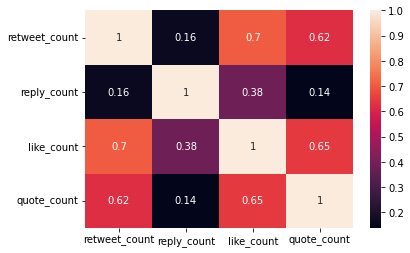

In [41]:
import seaborn as sns

sns.heatmap(df_correlacion.corr(),annot=True)

se puede ver que los 4 metricas tiene correlacion positiva, ademas fuerte. Sobre todo en la metrica de reweet y la de like. 

# Modelo


In [42]:
import pickle
# Para leer el modelo
with open('model/sentiment_model', 'rb') as archivo_entrada:
    model = pickle.load(archivo_entrada)

In [43]:
model

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=1000, min_df=5,
                                 ngram_range=(1, 2))),
                ('cls', LogisticRegression(C=0.5))])

In [44]:
df_text["text1"]

0                                                        recordar seman vien primer qued cps madr thebridgetech gran suert cont recuenc de charl plaz agot pod apunt grup proxim qued
1                                                   desarroll web perfil demand merc laboral descubr bootcamp desarroll web full stack man thebridgetech tod inform aqu {link} {link}
2                                                                                                                                            jorgegrev thebridgetech enhorabuen crack
3      hoy fin ve luz prim cas study publicon trabaj intens fin bootcamp realiz client real emancipatic dos seman vertical thebridgetech hic realid mvps invit verl dar {link} {link}
4                                         quier ser talent it españ si respuest cont alianz idbootcamps thebridgetechest felic abrir puert estudi partners conviert futur yellowers 🥳
                                                                                          

In [56]:
predictions = model.predict(df_text["text1"])

In [57]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [59]:
df_text["prediccón"]=predictions

In [60]:
df_text

,retweet_count,reply_count,like_count,quote_count,fecha,author_id,id,text,year,month,day,text1,prediccón
0,2,0,12,0,2022-10-04,1003872445,1577334577701453827,"Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech, en el que tendremos la gran suerte de contar con @Recuenco para que nos dé una charla. Las plazas se han agotado, pero os podéis apuntar al grupo para próximas quedadas 🚀",2022,10,4,recordar seman vien primer qued cps madr thebridgetech gran suert cont recuenc de charl plaz agot pod apunt grup proxim qued,0
1,3,0,3,0,2022-10-03,2529499620,1576902991507922944,El desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈\n\nDescubre nuestro #bootcamp Desarrollo Web Full Stack de la mano de @TheBridge_Tech 💻\n\nToda la información aquí! 👇\nhttps://t.co/LOoTu97aQq https://t.co/xpaAzxXSDX,2022,10,3,desarroll web perfil demand merc laboral descubr bootcamp desarroll web full stack man thebridgetech tod inform aqu {link} {link},0
2,0,0,1,0,2022-10-03,706520411551494145,1576856703349374976,@jorgegrev @TheBridge_Tech Enhorabuena crack!,2022,10,3,jorgegrev thebridgetech enhorabuen crack,0
3,3,0,4,0,2022-09-28,604485175,1575217357105946624,Hoy por fin ve la luz mi primer Case Study público. Un trabajo intensivo de fin de bootcamp realizado con un cliente real @emancipaTIC y dos semanas para que las 5 verticales en @TheBridge_Tech hiciésemos realidad un MVP. Os invito a verlo y dar feedback.\nhttps://t.co/rkCjxulYS9 https://t.co/PqM0dvxj3X,2022,9,28,hoy fin ve luz prim cas study publicon trabaj intens fin bootcamp realiz client real emancipatic dos seman vertical thebridgetech hic realid mvps invit verl dar {link} {link},0
4,1,1,2,0,2022-09-27,1391838162830385165,1574849353172373504,"¿Eres o quieres ser talento IT y estás en España? 🇪🇸 Si la respuesta es sí, te contamos que tenemos alianzas con @IDBootcamps y @TheBridge_Tech💻\n\nEstamos felices abrir nuestras puertas para que estudiantes de nuestros partners se conviertan en futuros Yellowers 🥳",2022,9,27,quier ser talent it españ si respuest cont alianz idbootcamps thebridgetechest felic abrir puert estudi partners conviert futur yellowers 🥳,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0,0,1,0,2022-06-13,18955785,1536313018321190912,Lo conseguí!!! Gracias @TheBridge_Tech @HeavyMental_es https://t.co/SOccLkT3dG,2022,6,13,consegu graci thebridgetech heavymental {link},0
149,0,0,1,0,2022-06-13,15521945,1536311923423203331,@TheBridge_Tech @HeavyMental_es @Alienta ¡Y yo! Que buena forma de empezar la semana.,2022,6,13,thebridgetech heavymental alient ¡y buen form empez seman,0
150,0,0,2,0,2022-06-13,10614452,1536310998319210496,@TheBridge_Tech @HeavyMental_es @Alienta ¡La tengo!,2022,6,13,thebridgetech heavymental alient ¡la,1
151,2,4,6,0,2022-06-13,1255794072280842240,1536310702876549123,Lo prometimos y han llegado gracias a @TheBridge_Tech ... últimas entradas para el podcast 27 en directo :D\n\ncc @Atorrerus @Mulder01198676 @joansabater @PesetJairo @pelayoarbues @adriskou @estodopornada https://t.co/Aygpl489sQ,2022,6,13,promet lleg graci thebridgetech ultim entrad podcast direct dcc atorrerus muld joansabat pesetjair pelayoarbu adriskou estodoporn {link},0


In [61]:
df_text["prediccón"].value_counts()

0    119
1     34
Name: prediccón, dtype: int64

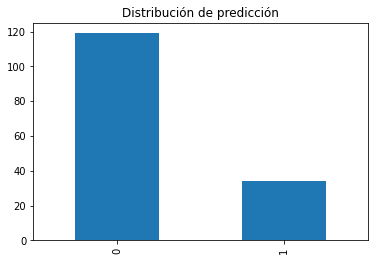

In [62]:
df_text["prediccón"].value_counts().plot(kind='bar')
plt.title('Distribución de predicción')
plt.show()

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.5, max_features=1000, min_df=5,
                                 ngram_range=(1, 2))
cv.fit(df_text["text1"])

CountVectorizer(max_df=0.5, max_features=1000, min_df=5, ngram_range=(1, 2))

In [47]:
feature_to_coef = {
    word: coef for word, coef in zip(
        model['vect'].get_feature_names_out(), model['cls'].coef_[0]
    )
}

In [48]:
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print(best_positive)
    
print('################################')
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print(best_negative)

('cuent', 1.427233666085361)
('deficit', 1.4022058325629765)
('blanc', 1.368604445686843)
('muert', 1.3502570413482133)
('conden', 1.3429067328197288)
################################
('encant', -1.8605111981502893)
('enhorabuen', -1.8449366081495842)
('graci', -1.805329609096349)
('buen', -1.6751185631684895)
('feliz', -1.4730851687952473)


In [49]:
feature_importante = pd.Series({'cuent':1.427233666085361, 'deficit': 1.4022058325629765,
                  'blanc': 1.368604445686843, 'muert': 1.3502570413482133,
                 'conden': 1.3429067328197288,
                'encant': -1.8605111981502893, 'enhorabuen': -1.8449366081495842,
                 'graci': -1.805329609096349, 'buen': -1.6751185631684895,
                 'feliz': -1.4730851687952473})

data = pd.DataFrame({'feature_importante':feature_importante})
data

,feature_importante
cuent,1.427234
deficit,1.402206
blanc,1.368604
muert,1.350257
conden,1.342907
encant,-1.860511
enhorabuen,-1.844937
graci,-1.805330
buen,-1.675119
feliz,-1.473085


In [50]:
text = "pero os podéis apuntar al grupo para próximas quedadas 🚀"

In [51]:

    
text=nito.clean_emoji(text)
text=signs_tweets(text)
text=remove_links(text)
text=remove_stopwords(text)
text=spanish_stemmer(text)

In [52]:
X = []
X.append(text)

In [53]:
result = model.predict(X)

In [54]:
result

array([0])